In [15]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import time
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_selector as selector #Para seleccionar de forma automática las variables numéricas y categóricas
from sklearn.preprocessing import OneHotEncoder #Para codificar las variables categóricas usando dummies
from sklearn.preprocessing import StandardScaler #Para normalizar las variables numéricas
from sklearn.compose import ColumnTransformer #Modifica las columnas usando los preprocesadores
from sklearn.pipeline import make_pipeline #Planifica una secuencia de procesos
from sklearn import set_config #Para mostrar graficamente el pipeline
from sklearn.model_selection import GridSearchCV

set_config(display='diagram')
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [2]:

df = pd.read_csv('train.csv')
df_clean = df.dropna(subset=['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'SalePrice'])


print("Dimensiones del DataFrame:", df.shape)
print(df.head())

Dimensiones del DataFrame: (1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondit

In [3]:
df_clean = df.dropna(subset=['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'SalePrice'])

precio_33 = np.percentile(df_clean['SalePrice'], 33)
precio_66 = np.percentile(df_clean['SalePrice'], 66)

def categorizar_precio(precio):
    if precio <= precio_33:
        return 'Económica'
    elif precio <= precio_66:
        return 'Intermedia'
    else:
        return 'Cara'


df_clean['PriceCategory'] = df_clean['SalePrice'].apply(categorizar_precio)

print(df_clean['PriceCategory'].value_counts(normalize=True))

PriceCategory
Cara          0.340411
Económica     0.330822
Intermedia    0.328767
Name: proportion, dtype: float64


In [4]:

X = df_clean.drop(['Id','SalePrice','PriceCategory'], axis=1)
y = df_clean['PriceCategory']


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)


preprocesador = ColumnTransformer([
    ("num", make_pipeline(
        SimpleImputer(strategy="median"),
        StandardScaler()
    ), selector(dtype_include=["int64","float64"])),
    ("cat", make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OneHotEncoder(handle_unknown="ignore")
    ), selector(dtype_include=object))
])


# Usa 'preprocessor_fixed' en lugar de 'preprocesador'
modelo1 = make_pipeline(
    preprocesador,
    MLPClassifier(hidden_layer_sizes=(5,3), activation="tanh", solver="adam", max_iter=300, verbose=True, random_state=42)
)
modelo2 = make_pipeline(
    preprocesador,
    MLPClassifier(hidden_layer_sizes=(10,5), activation="relu", solver="adam", max_iter=300, verbose=True, random_state=42)
)

# Entrena y evalúa
modelo1.fit(X_train, y_train)
modelo2.fit(X_train, y_train)
# … evaluación como antes …


# Evaluar los modelos en el conjunto de prueba
for i, modelo in enumerate([modelo1, modelo2], start=1):
    y_pred = modelo.predict(X_test)
    print(f"\n--- Evaluación Modelo {i} ---")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
    print("F1-score :", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Iteration 1, loss = 1.19514329
Iteration 2, loss = 1.09905710
Iteration 3, loss = 1.01297718
Iteration 4, loss = 0.94013716
Iteration 5, loss = 0.87743444
Iteration 6, loss = 0.83291879
Iteration 7, loss = 0.79894293
Iteration 8, loss = 0.77114572
Iteration 9, loss = 0.74849473
Iteration 10, loss = 0.72914893
Iteration 11, loss = 0.71272449
Iteration 12, loss = 0.69745531
Iteration 13, loss = 0.68380692
Iteration 14, loss = 0.67112269
Iteration 15, loss = 0.65955715
Iteration 16, loss = 0.64923108
Iteration 17, loss = 0.63872574
Iteration 18, loss = 0.62899549
Iteration 19, loss = 0.61976816
Iteration 20, loss = 0.61053097
Iteration 21, loss = 0.60181694
Iteration 22, loss = 0.59314861
Iteration 23, loss = 0.58499923
Iteration 24, loss = 0.57694785
Iteration 25, loss = 0.56887984
Iteration 26, loss = 0.56112805
Iteration 27, loss = 0.55348571
Iteration 28, loss = 0.54591316
Iteration 29, loss = 0.53858579
Iteration 30, loss = 0.53179884
Iteration 31, loss = 0.52466459
Iteration 32, los

/home/danidubon12/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, loss = 0.85467553
Iteration 18, loss = 0.84779751
Iteration 19, loss = 0.84091089
Iteration 20, loss = 0.83353346
Iteration 21, loss = 0.82603282
Iteration 22, loss = 0.81857613
Iteration 23, loss = 0.81132273
Iteration 24, loss = 0.80433331
Iteration 25, loss = 0.79625383
Iteration 26, loss = 0.78883047
Iteration 27, loss = 0.78214403
Iteration 28, loss = 0.77530864
Iteration 29, loss = 0.76891856
Iteration 30, loss = 0.76303794
Iteration 31, loss = 0.75655760
Iteration 32, loss = 0.75147573
Iteration 33, loss = 0.74372864
Iteration 34, loss = 0.73819014
Iteration 35, loss = 0.73101499
Iteration 36, loss = 0.72474366
Iteration 37, loss = 0.71880236
Iteration 38, loss = 0.71279568
Iteration 39, loss = 0.70678816
Iteration 40, loss = 0.70045024
Iteration 41, loss = 0.69430310
Iteration 42, loss = 0.68848691
Iteration 43, loss = 0.68314459
Iteration 44, loss = 0.67766123
Iteration 45, loss = 0.67026911
Iteration 46, loss = 0.66478910
Iteration 47, loss = 0.65808654
Iteratio

/home/danidubon12/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


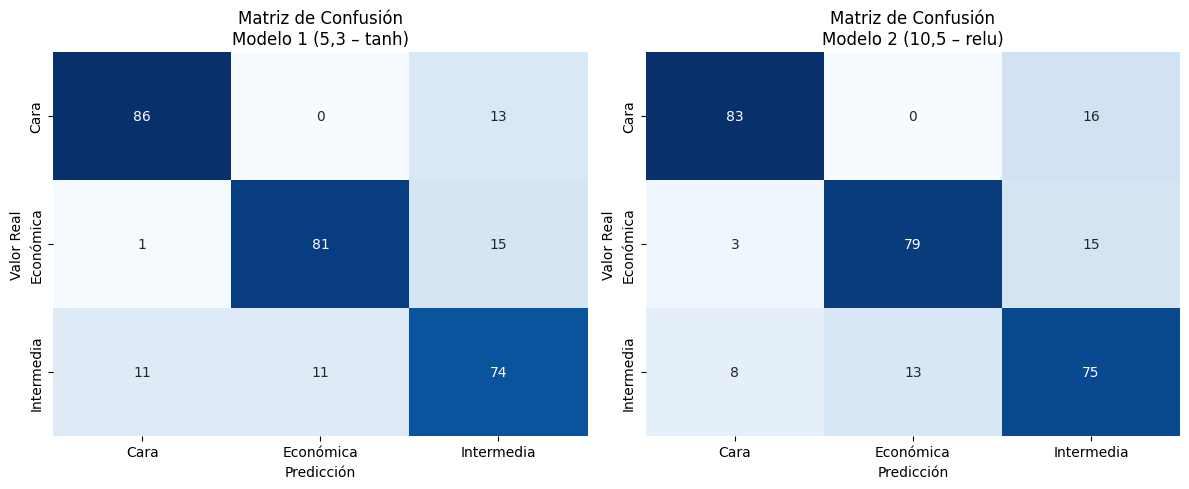

In [5]:

modelos = [
    ("Modelo 1 (5,3 – tanh)", modelo1),
    ("Modelo 2 (10,5 – relu)", modelo2)
]


clases = modelo1.named_steps['mlpclassifier'].classes_

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, (nombre, modelo) in zip(axes, modelos):
 
    y_pred = modelo.predict(X_test)
  
    cm = confusion_matrix(y_test, y_pred, labels=clases)

    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        xticklabels=clases,
        yticklabels=clases,
        ax=ax
    )
    ax.set_title(f"Matriz de Confusión\n{nombre}")
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Valor Real")

plt.tight_layout()


Comparando ambos modelos, el Modelo 1 (arquitectura 5–3 con función de activación tanh) obtuvo un 82.5 % de accuracy frente al 81.2 % del Modelo 2 (10–5 con activación relu), además de mejores precision (82.9 % vs 81.7 %) y F1-score (82.6 % vs 81.3 %), y su matriz de confusión muestra menos confusiones entre las tres categorías (especialmente “Cara” y “Económica”). El Modelo 1 también convergió correctamente en 300 iteraciones con un loss más bajo, mientras que el Modelo 2 no llegó a converger en ese mismo número de iteraciones. En conjunto, el Modelo 1 ofrece un mejor equilibrio entre efectividad y eficiencia, cometiendo menos errores y convergiendo de forma más estable.

In [10]:

y_train_pred = modelo1.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)


y_test_pred = modelo1.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy entrenamiento: {acc_train:.3f}")
print(f"Accuracy prueba     : {acc_test:.3f}")

Accuracy entrenamiento: 0.992
Accuracy prueba     : 0.825


La diferencia entre Accuracy entrenamiento (0.992) y Accuracy prueba (0.825) es muy grande puede ser un indicio de sobreajuste

In [16]:

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

# Pipeline con early stopping
pipe = make_pipeline(
    preprocesador,
    MLPClassifier(
        solver="adam",
        early_stopping=True,
        validation_fraction=0.2,
        n_iter_no_change=10,
        max_iter=1000,
        random_state=42
    )
)

# GridSearch como antes
grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train_enc)

print("Mej prefs:", grid.best_params_)
print("Mejor F1 (CV):", grid.best_score_)

best = grid.best_estimator_
print("Acc training:", best.score(X_train, y_train_enc))
print("Acc testing :", best.score(X_test,  y_test_enc))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(5, 3), mlpclassifier__learning_rate_init=0.001; total time=   0.1s
[CV] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(8, 4), mlpclassifier__learning_rate_init=0.001; total time=   0.1s
[CV] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(10, 5), mlpclassifier__learning_rate_init=0.001; total time=   0.1s
[CV] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(10, 5), mlpclassifier__learning_rate_init=0.01; total time=   0.1s
[CV] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.001, mlpclassifier__hidden_layer_sizes=(5, 3), mlpclassifier__learning_rate_init=0.01; total time=   0.1s
[CV] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.001, mlpclassif

In [17]:
X_reg = df_clean.drop(['Id', 'SalePrice', 'PriceCategory'], axis=1)
y_reg = df_clean['SalePrice']

from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg,
    y_reg,
    test_size=0.20,
    random_state=42
)

print("X_train_reg:", X_train_reg.shape)
print("X_test_reg :", X_test_reg.shape)
print("y_train_reg distribuciones:\n", y_train_reg.describe())


X_train_reg: (1168, 79)
X_test_reg : (292, 79)
y_train_reg distribuciones:
 count      1168.000000
mean     181441.541952
std       77263.583862
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      214925.000000
max      745000.000000
Name: SalePrice, dtype: float64
